In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

excluded = {'pr', 'dc'}

data = pd.read_csv("../data/historical_state_population_by_year.csv", on_bad_lines='skip')
data = data[(data['year'] >= 1950) & (data['year'] <= 2014)]
data["state"]=data["state"].str.lower()

# Filter out non-states
data["state"]=data["state"][data["state"].isin(excluded)==False]
data = data.dropna(subset=['state'])



df = pd.read_csv("../data/complete.csv", on_bad_lines='skip')
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
df=df[df["country"]=="us"].sort_index(level="datetime")
df["state"]=df["state"][df["state"].isin(excluded)==False]
df = df.dropna(subset=['datetime'])
df = df.sort_values(by='datetime').reset_index(drop=True)
df=df.dropna()
df['year'] = df['datetime'].dt.year
df = df[(df['year'] >= 1950) & (df['year'] <= 2014)]

# Group by state and year
grouped = df.groupby(['state', 'year']).size().reset_index(name='num_sightings')

# Create complete state-year grid
all_states = df['state'].unique()
all_years = range(1950, 2015)
full_index = pd.MultiIndex.from_product([all_states, all_years], names=['state', 'year'])

# Reindex to include all combinations, fill missing with 0
sightings_summary = grouped.set_index(['state', 'year']).reindex(full_index, fill_value=0).reset_index()
sightings_summary = sightings_summary.sort_values(by=['state', 'year']).reset_index(drop=True)


C:\Users\anton\AppData\Local\Temp\ipykernel_96532\711170306.py:17: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/complete.csv", on_bad_lines='skip')


In [227]:
sightings_summary.head()

,state,year,num_sightings
0,ak,1950,0
1,ak,1951,0
2,ak,1952,0
3,ak,1953,0
4,ak,1954,1


In [228]:
data.head()

,state,year,population
0,ak,1950,135000
1,ak,1951,158000
2,ak,1952,189000
3,ak,1953,205000
4,ak,1954,215000


In [229]:
merged = pd.merge(data, sightings_summary, on=['state', 'year'])

# Drop any rows with missing data (just in case)
merged = merged.dropna(subset=['population', 'num_sightings'])

# Calculate correlation
correlation = merged['population'].corr(merged['num_sightings'])
correlation

0.5696297006636651

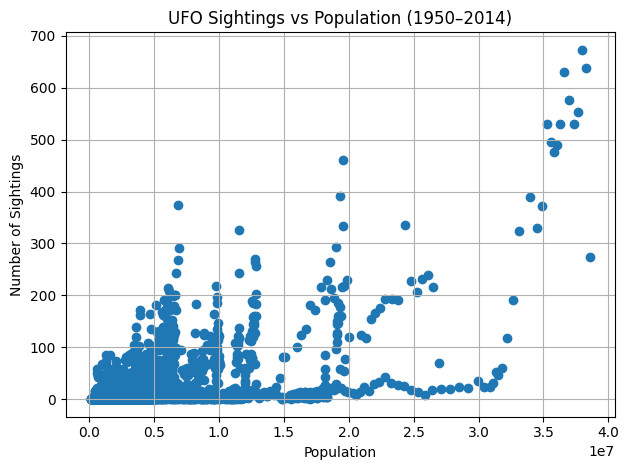

In [230]:
plt.scatter(data["population"], sightings_summary["num_sightings"], label="Population")
plt.title('UFO Sightings vs Population (1950–2014)')
plt.xlabel('Population')
plt.ylabel('Number of Sightings')
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', ncol=2)
plt.tight_layout()
plt.grid(True)
plt.show()

In [231]:
sightings_summary

,state,year,num_sightings
0,ak,1950,0
1,ak,1951,0
2,ak,1952,0
3,ak,1953,0
4,ak,1954,1
...,...,...,...
3245,wy,2010,11
3246,wy,2011,17
3247,wy,2012,12
3248,wy,2013,13


In [232]:
dummyyear = 2008
sightings_summary["num_sightings"][sightings_summary["year"]==dummyyear]

58       10
123      46
188      32
253     153
318     630
383      92
448      52
513       9
578     265
643      95
708      12
773      31
838      19
903     146
968     111
1033     26
1098     62
1163     40
1228     66
1293     54
1358     22
1423    121
1488     49
1553     92
1618     18
1683     17
1748    121
1813      9
1878     15
1943     31
2008     78
2073     50
2138     58
2203    185
2268    121
2333     51
2398     80
2463    159
2528     16
2593     37
2658      7
2723     86
2788    336
2853     24
2918     88
2983      9
3048    179
3113     59
3178     26
3243      8
Name: num_sightings, dtype: int64

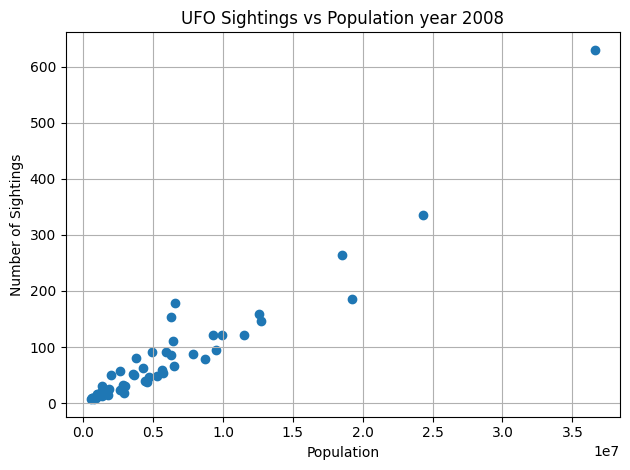

In [233]:
dummyyear = 2008
#cumsom=sum(sightings_summary["num_sightings"][sightings_summary["year"]==dummyyear])
plt.scatter(data["population"][data["year"]==dummyyear], sightings_summary["num_sightings"][sightings_summary["year"]==dummyyear], label="Population")
plt.title('UFO Sightings vs Population year 'f"{dummyyear}")
plt.xlabel('Population')
plt.ylabel('Number of Sightings')
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', ncol=2)
plt.tight_layout()
plt.grid(True)
plt.show()

In [234]:
import matplotlib.pyplot as plt
import pandas as pd
from ipywidgets import interact, IntSlider
from sklearn.linear_model import LinearRegression
import numpy as np

# Assuming data and sightings_summary are pandas DataFrames

def plot_ufo_vs_population(dummyyear):
    # Filter the data for the selected year
    x = data["population"][data["year"] == dummyyear].values.reshape(-1, 1)
    y = sightings_summary["num_sightings"][sightings_summary["year"] == dummyyear].values

    # Check if there are enough points to fit a model
    if len(x) > 1 and len(y) > 1:
        model = LinearRegression()
        model.fit(x, y)
        slope = model.coef_[0]
        y_pred = model.predict(x)
    else:
        slope = None
        y_pred = None

    # Plot
    plt.figure(figsize=(8, 5))
    plt.scatter(x, y, label="Population vs Sightings")
    
    if slope is not None:
        plt.plot(x, y_pred, color='red', label=f"Fit: slope = {slope:.2f}")
    
    plt.title(f'UFO Sightings vs Population - Year {dummyyear}')
    plt.xlabel('Population')
    plt.ylabel('Number of Sightings')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Create interactive slider from the available years
interact(plot_ufo_vs_population, dummyyear=IntSlider(min=data["year"].min(), max=data["year"].max(), step=1, value=2008))


interactive(children=(IntSlider(value=2008, description='dummyyear', max=2014, min=1950), Output()), _dom_clas…

<function __main__.plot_ufo_vs_population(dummyyear)>

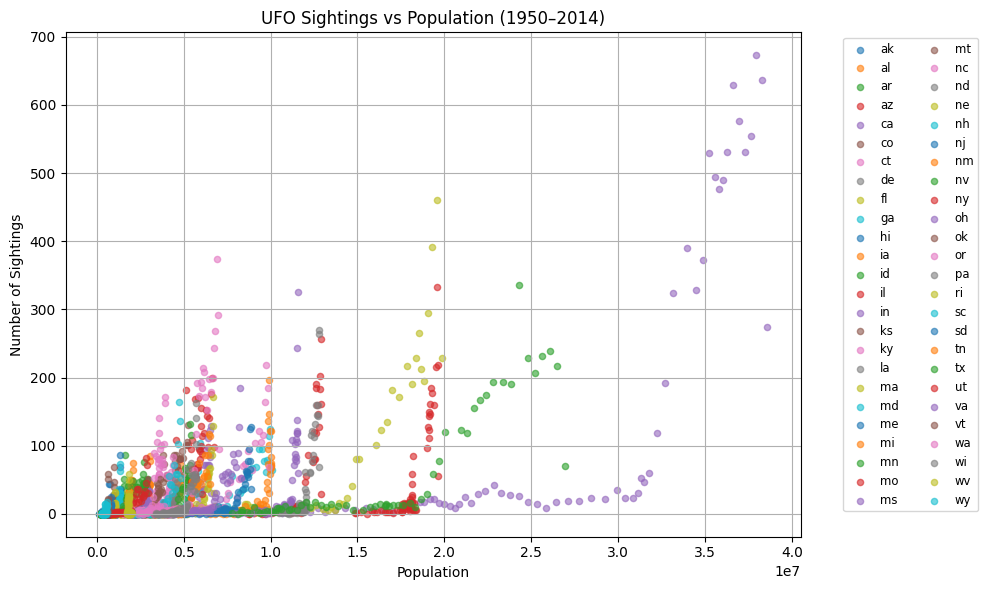

In [235]:
plt.figure(figsize=(10, 6))

# Plot each state as a different color
for state in merged['state'].unique():
    state_data = merged[merged['state'] == state]
    plt.scatter(state_data['population'], state_data['num_sightings'], label=state, alpha=0.6, s=20)

plt.title('UFO Sightings vs Population (1950–2014)')
plt.xlabel('Population')
plt.ylabel('Number of Sightings')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', ncol=2)
plt.tight_layout()
plt.grid(True)
plt.show()

In [236]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, Slider, CustomJS
from bokeh.layouts import column
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import json

output_notebook()

# Assuming your merged dataset is already available
# data = ...
# sightings_summary = ...

# Merge the data
merged = pd.merge(data, sightings_summary, on=['year', 'state'])

# Calculate correlation for each year
state_correlations = merged.groupby('year').apply(
    lambda g: g['population'].corr(g['num_sightings'])
).reset_index(name='correlation')

# Prepare data and metadata
year_data = {}
plot_meta = {}

for year in sorted(merged['year'].unique()):
    df = merged[merged['year'] == year]
    x = df['population'].values
    y = df['num_sightings'].values
    if len(x) > 1:
        model = LinearRegression()
        model.fit(x.reshape(-1, 1), y)
        y_pred = model.predict(x.reshape(-1, 1))

        # Calculate R^2
        ss_res = np.sum((y - y_pred) ** 2)  # residual sum of squares
        ss_tot = np.sum((y - np.mean(y)) ** 2)  # total sum of squares
        r2 = 1 - (ss_res / ss_tot)

        slope = model.coef_[0]
        intercept = model.intercept_
    else:
        y_pred = np.zeros_like(x)
        slope = 0
        intercept = 0
        r2 = 0  # Not enough data for meaningful R² calculation

    # Get correlation for the current year
    correlation = state_correlations[state_correlations['year'] == year]['correlation'].values[0]

    # Save regression data
    year_data[str(year)] = {
        'x': x.tolist(),
        'y': y.tolist(),
        'y_pred': y_pred.tolist()
    }

    plot_meta[str(year)] = {
        'title': f"UFO Sightings vs Population - {year} | y = {slope:.2f}x + {intercept:.2f} | R² = {r2:.2f} | Correlation = {correlation:.2f}"
    }

# Convert to JSON
year_data_json = json.dumps(year_data)
plot_meta_json = json.dumps(plot_meta)

# Initial year
initial_year = str(sorted(merged['year'].unique())[0])
source = ColumnDataSource(data=year_data[initial_year])

# Create plot
p = figure(height=400, width=600,
           title=plot_meta[initial_year]['title'],
           x_axis_label='Population', y_axis_label='Number of Sightings')

p.circle('x', 'y', size=8, source=source, legend_label="Data")
p.line('x', 'y_pred', source=source, line_width=2, color='red', legend_label="Regression Line")
p.legend.location = "top_left"

# Slider
slider = Slider(start=merged['year'].min(), end=merged['year'].max(),
                value=int(initial_year), step=1, title="Year")

# JavaScript callback
callback = CustomJS(args=dict(source=source, slider=slider, plot=p),
    code=f"""
    const year_data = {year_data_json};
    const meta = {plot_meta_json};
    const year = slider.value.toString();

    source.data = year_data[year];
    plot.title.text = meta[year].title;
    source.change.emit();
""")

slider.js_on_change('value', callback)

# Show layout
show(column(slider, p))


Loading BokehJS ...

C:\Users\anton\AppData\Local\Temp\ipykernel_96532\2972733765.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  state_correlations = merged.groupby('year').apply(


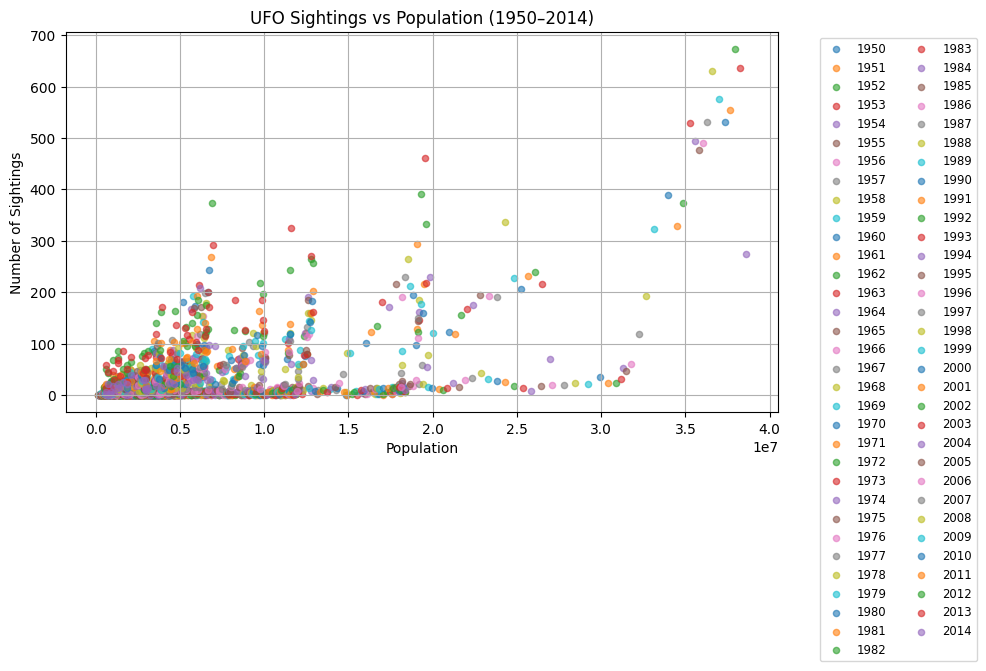

In [237]:
plt.figure(figsize=(10, 6))

# Plot each state as a different color
for state in merged['year'].unique():
    state_data = merged[merged['year'] == state]
    plt.scatter(state_data['population'], state_data['num_sightings'], label=state, alpha=0.6, s=20)

plt.title('UFO Sightings vs Population (1950–2014)')
plt.xlabel('Population')
plt.ylabel('Number of Sightings')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', ncol=2)
plt.tight_layout()
plt.grid(True)
plt.show()

In [238]:
# Group by state and calculate correlation for each
state_correlations = merged.groupby('year').apply(
    lambda g: g['population'].corr(g['num_sightings'])
).reset_index(name='correlation')

# Sort by correlation value
state_correlations = state_correlations.sort_values(by='correlation', ascending=False).reset_index(drop=True)

# Display top results
print(state_correlations.head(10),state_correlations.tail(10))
print(state_correlations[state_correlations["year"]==2012])


   year  correlation
0  2008     0.955354
1  2009     0.932136
2  1979     0.923227
3  2007     0.918518
4  2011     0.917496
5  2006     0.917415
6  1992     0.914901
7  2010     0.910760
8  2005     0.904767
9  1988     0.901358     year  correlation
55  1960     0.683100
56  1955     0.678583
57  1961     0.666662
58  1964     0.642008
59  1956     0.588274
60  1952     0.576766
61  1958     0.506954
62  1950     0.407323
63  1953     0.398800
64  1951     0.344866
    year  correlation
11  2012     0.890528


C:\Users\anton\AppData\Local\Temp\ipykernel_96532\658423093.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  state_correlations = merged.groupby('year').apply(


In [239]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, Slider, CustomJS
from bokeh.layouts import column
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import json

output_notebook()

# Use your real data here
# data = ...
# sightings_summary = ...

# Merge data
merged = pd.merge(data, sightings_summary, on=['year', 'state'])

# Prepare data and metadata
year_data = {}
plot_meta = {}

for year in sorted(merged['year'].unique()):
    df = merged[merged['year'] == year]
    x = df['population'].values
    y = df['num_sightings'].values
    if len(x) > 1:
        model = LinearRegression()
        model.fit(x.reshape(-1, 1), y)
        y_pred = model.predict(x.reshape(-1, 1))

        # Calculate R^2
        ss_res = np.sum((y - y_pred) ** 2)  # residual sum of squares
        ss_tot = np.sum((y - np.mean(y)) ** 2)  # total sum of squares
        r2 = 1 - (ss_res / ss_tot)

        slope = model.coef_[0]
        intercept = model.intercept_
    else:
        y_pred = np.zeros_like(x)
        slope = 0
        intercept = 0
        r2 = 0  # Not enough data for meaningful R² calculation

    # Save regression data
    year_data[str(year)] = {
        'x': x.tolist(),
        'y': y.tolist(),
        'y_pred': y_pred.tolist()
    }

    plot_meta[str(year)] = {
        'title': f"UFO Sightings vs Population - {year} | y = {slope:.2f}x + {intercept:.2f} | R² = {r2:.2f}"
    }

# Convert to JSON
year_data_json = json.dumps(year_data)
plot_meta_json = json.dumps(plot_meta)

# Initial year
initial_year = str(sorted(merged['year'].unique())[0])
source = ColumnDataSource(data=year_data[initial_year])

# Create plot
p = figure(height=400, width=600,
           title=plot_meta[initial_year]['title'],
           x_axis_label='Population', y_axis_label='Number of Sightings')

p.circle('x', 'y', size=8, source=source, legend_label="Data")
p.line('x', 'y_pred', source=source, line_width=2, color='red', legend_label="Regression Line")
p.legend.location = "top_left"

# Slider
slider = Slider(start=merged['year'].min(), end=merged['year'].max(),
                value=int(initial_year), step=1, title="Year")

# JavaScript callback
callback = CustomJS(args=dict(source=source, slider=slider, plot=p),
    code=f"""
    const year_data = {year_data_json};
    const meta = {plot_meta_json};
    const year = slider.value.toString();

    source.data = year_data[year];
    plot.title.text = meta[year].title;
    source.change.emit();
""")

slider.js_on_change('value', callback)

# Show layout
show(column(slider, p))


Loading BokehJS ...

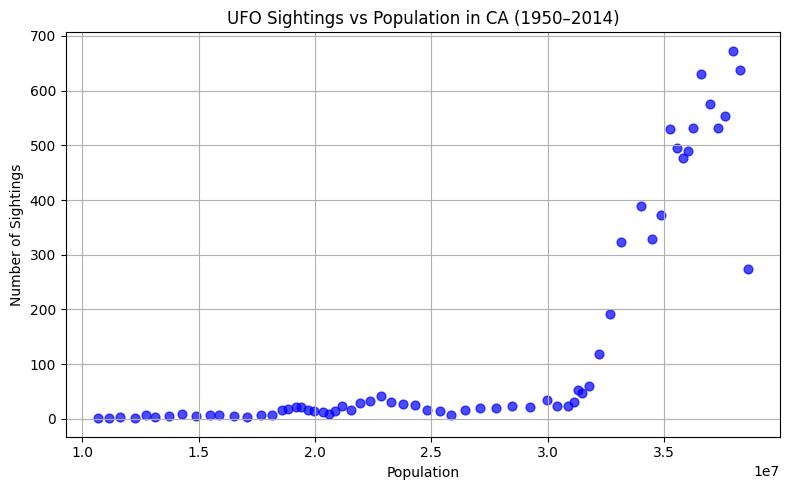

In [240]:
chosen_state = 'ca'  # Replace with any valid state abbreviation in lowercase

# Filter the data for that state
state_data = merged[merged['state'] == chosen_state]

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(state_data['population'], state_data['num_sightings'], alpha=0.7, color='blue', s=40)
plt.title(f'UFO Sightings vs Population in {chosen_state.upper()} (1950–2014)')
plt.xlabel('Population')
plt.ylabel('Number of Sightings')
plt.grid(True)
plt.tight_layout()
plt.show()


In [241]:
import pandas as pd
data = pd.read_csv("../data/complete.csv", on_bad_lines='skip')

C:\Users\anton\AppData\Local\Temp\ipykernel_96532\793543894.py:2: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("../data/complete.csv", on_bad_lines='skip')
